# Introduction

If you have been using GBM as a ‘black box’ till now, may be it’s time for you to open it and see, how it actually works!

Boosting algorithms play a crucial role in dealing with bias variance trade-off.  Unlike bagging algorithms, which only controls for high variance in a model, boosting controls both the aspects (bias & variance), and is considered to be more effective.  A sincere understanding of GBM here should give you much needed confidence to deal with such critical issues.

In this article, I’ll disclose the science behind using GBM using Python. And, most important, how you can tune its parameters and obtain incredible results.

# Table of Contents
1. How Boosting Works?
2. Understanding GBM Parameters
3. Data Preparation

# 1. How Boosting Works ?

Boosting is a sequential technique which works on the principle of ensemble. It combines a set of weak learners and delivers improved prediction accuracy. At any instant t, the model outcomes are weighed based on the outcomes of previous instant t-1. The **outcomes predicted correctly** are given a **lower weight** and the **ones miss-classified** are **weighted higher**. This technique is followed for a classification problem while a similar technique is used for regression.

# 2. GBM Parameters

The overall parameters can be divided into 3 categories:

- **Tree-Specific Parameters**: These affect each individual tree in the model.
- **Boosting Parameters**: These affect the boosting operation in the model.
- **Miscellaneous Parameters**: Other parameters for overall functioning.

## 2.1 Tree-Specific Parameters
1. **min_samples_split**
    - Defines the minimum number of samples (or observations) which are required in a node to be considered for splitting.
    - Used to control over-fitting. Higher values prevent a model from learning relations which might be highly specific to the particular sample selected for a tree.
    - Too high values can lead to under-fitting hence, it should be tuned using CV.
2. **min_samples_leaf**
    - Defines the minimum samples (or observations) required in a terminal node or leaf.
    - Used to control over-fitting similar to min_samples_split.
    - Generally lower values should be chosen for imbalanced class problems because the regions in which the minority class will be in majority will be very small.
3. **min_weight_fraction_leaf**
    - Similar to min_samples_leaf but defined as a fraction of the total number of observations instead of an integer.
    - Only one of #2 and #3 should be defined.
4. **max_depth**
    - The maximum depth of a tree.
    - Used to control over-fitting as higher depth will allow model to learn relations very specific to a particular sample.
    - Should be tuned using CV.
5. **max_leaf_nodes**
    - The maximum number of terminal nodes or leaves in a tree.
    - Can be defined in place of max_depth. Since binary trees are created, a depth of ‘n’ would produce a maximum of 2^n leaves.
    - If this is defined, GBM will ignore max_depth.
6. **max_features**
    - The number of features to consider while searching for a best split. These will be randomly selected.
    - As a thumb-rule, square root of the total number of features works great but we should check upto 30-40% of the total number of features.
    - Higher values can lead to over-fitting but depends on case to case.
    
**Pseudo-code of the GBM algorithm for 2 classes:
1. Initialize the outcome
2. Iterate from 1 tototal number of trees
    2.1 Update the weights for targets based on previous run (higher for the one mis-classfied)
    2.2 Fit the model on selected subsample of data
    2.3 Make predictions on the full set of obserations
    2.4 Update the output with current results taking into account the learning rate
3. Return the final output

**Note**: Above, is an extremely simplified (probably naive) explanation of GBM's working. The parameters which we have considered so far will affect step 2.2, i.e. model building. Next is we consider another set of parameters for managing boosting:

## 2.2 Boosting Parameters
1. **learning_rate**
    - This determines the impact of each tree on the final outcome (step 2.4). GBM works by starting with an initial estimate which is updated using the output of each tree. The learning parameter controls the magnitude of this change in the estimates.
    - Lower values are generally preferred as they make the model robust to the specific characteristics of tree and thus allowing it to generalize well.
    - Lower values would require higher number of trees to model all the relations and will be computationally expensive.
2. **n_estimators**
    - The number of sequential trees to be modeled (step 2)
    - Though GBM is fairly robust at higher number of trees but it can still overfit at a point. Hence, this should be tuned using CV for a particular learning rate.
3. **subsample**
    - The fraction of observations to be selected for each tree. Selection is done by random sampling.
    - Values slightly less than 1 make the model robust by reducing the variance.
    - Typical values ~0.8 generally work fine but can be fine-tuned further.

Finally, other miscellaneous parameters which affect the overall functionality.

## 2.3 Miscellaneous Parameters
1. **loss**
    - It refers to the loss function to be minimized in each split.
    - It can have various values for classification and regression case. Generally the default values work fine. Other values should be chosen only if you understand their impact on the model.
2. **init**
    - This affects initialization of the output.
    - This can be used if we have made another model whose outcome is to be used as the initial estimates for GBM.
3. **random_state**
    - The random number seed so that same random numbers are generated every time.
    - This is important for parameter tuning. If we don’t fix the random number, then we’ll have different outcomes for subsequent runs on the same parameters and it becomes difficult to compare models.
    - It can potentially result in overfitting to a particular random sample selected. We can try running models for different random samples, which is computationally expensive and generally not used.
4. **verbose**
    - The type of output to be printed when the model fits. The different values can be:
        - 0: no output generated (default)
        - 1: output generated for trees in certain intervals
        - >1: output generated for all trees
5. **warm_start**
    - This parameter has an interesting application and can help a lot if used judicially.
    - Using this, we can fit additional trees on previous fits of a model. It can save a lot of time and you should explore this option for advanced applications
6. **presort **
    - Select whether to presort data for faster splits.
    - It makes the selection automatically by default but it can be changed if needed.
    
# 3. Data Preparation
## 3.1 Load Libraries

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

#Load data:
train = pd.read_csv(r'C:\Users\LW130003\Desktop\Data Science\Data Science Projects\Hackathon\Train_nyOWmfK.csv',encoding = "ISO-8859-1")
test = pd.read_csv(r'C:\Users\LW130003\Desktop\Data Science\Data Science Projects\Hackathon\Test_bCtAN1w.csv',encoding = "ISO-8859-1")

train.shape, test.shape

((87020, 26), (37717, 24))

In [2]:
train.dtypes

ID                        object
Gender                    object
City                      object
Monthly_Income             int64
DOB                       object
Lead_Creation_Date        object
Loan_Amount_Applied      float64
Loan_Tenure_Applied      float64
Existing_EMI             float64
Employer_Name             object
Salary_Account            object
Mobile_Verified           object
Var5                       int64
Var1                      object
Loan_Amount_Submitted    float64
Loan_Tenure_Submitted    float64
Interest_Rate            float64
Processing_Fee           float64
EMI_Loan_Submitted       float64
Filled_Form               object
Device_Type               object
Var2                      object
Source                    object
Var4                       int64
LoggedIn                   int64
Disbursed                  int64
dtype: object

In [3]:
#Combine into data:
train['source']= 'train'
test['source'] = 'test'
data=pd.concat([train, test],ignore_index=True)
data.shape

(124737, 27)

In [4]:
# Check missing data
data.apply(lambda x: sum(x.isnull()))
# or data.isnull().sum() for short

City                      1401
DOB                          0
Device_Type                  0
Disbursed                37717
EMI_Loan_Submitted       84901
Employer_Name              113
Existing_EMI               111
Filled_Form                  0
Gender                       0
ID                           0
Interest_Rate            84901
Lead_Creation_Date           0
Loan_Amount_Applied        111
Loan_Amount_Submitted    49535
Loan_Tenure_Applied        111
Loan_Tenure_Submitted    49535
LoggedIn                 37717
Mobile_Verified              0
Monthly_Income               0
Processing_Fee           85346
Salary_Account           16801
Source                       0
Var1                         0
Var2                         0
Var4                         0
Var5                         0
source                       0
dtype: int64

In [5]:
# Look for categories of all variables
var = ['Gender','Salary_Account','Mobile_Verified','Var1','Filled_Form','Device_Type','Var2','Source']
for v in var:
    print('\nFrequency count for variable %s'%v)
    print(data[v].value_counts())


Frequency count for variable Gender
Male      71398
Female    53339
Name: Gender, dtype: int64

Frequency count for variable Salary_Account
HDFC Bank                                          25180
ICICI Bank                                         19547
State Bank of India                                17110
Axis Bank                                          12590
Citibank                                            3398
Kotak Bank                                          2955
IDBI Bank                                           2213
Punjab National Bank                                1747
Bank of India                                       1713
Bank of Baroda                                      1675
Standard Chartered Bank                             1434
Canara Bank                                         1385
Union Bank of India                                 1330
Yes Bank                                            1120
ING Vysya                                            996
Corp

In [6]:
# Handle Individual Variables:
# City Variable:

len(data['City'].unique())

#drop city because too many unique
data.drop('City',axis=1,inplace=True)

In [7]:
# Determine Age from DOB

data['DOB'].head()

0    23-May-78
1    07-Oct-85
2    10-Oct-81
3    30-Nov-87
4    17-Feb-84
Name: DOB, dtype: object

In [8]:
#Create age variable:
data['Age'] = data['DOB'].apply(lambda x: 115 - int(x[-2:]))
data['Age'].head()

0    37
1    30
2    34
3    28
4    31
Name: Age, dtype: int64

In [9]:
#drop DOB:
data.drop('DOB',axis=1,inplace=True)

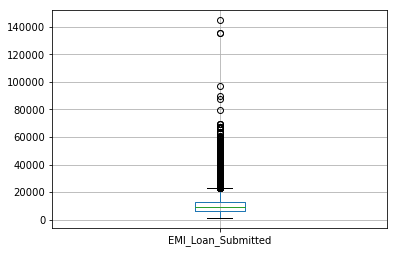

In [10]:
# EMI_Load_Submitted
data.boxplot(column=['EMI_Loan_Submitted'],return_type='axes')

In [11]:
#Majority values missing so create a new variable stating whether this is missing or note:
data['EMI_Loan_Submitted_Missing'] = data['EMI_Loan_Submitted'].apply(lambda x: 1 if pd.isnull(x) else 0)
data[['EMI_Loan_Submitted','EMI_Loan_Submitted_Missing']].head(10)

,EMI_Loan_Submitted,EMI_Loan_Submitted_Missing
0,NaN,1
1,6762.90,0
2,NaN,1
3,NaN,1
4,NaN,1
5,6978.92,0
6,NaN,1
7,NaN,1
8,30824.65,0
9,10883.38,0


In [12]:
#drop original vaiables:
data.drop('EMI_Loan_Submitted',axis=1,inplace=True)

In [13]:
# Employer Name

len(data['Employer_Name'].value_counts())

57193

In [14]:
# Drop the variable because too many unique values. Another option could be to categorize them manually
data.drop('Employer_Name',axis=1,inplace=True)

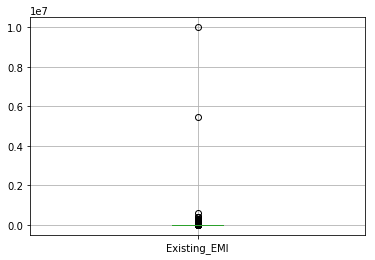

In [15]:
# Existing EMI

data.boxplot(column='Existing_EMI',return_type='axes')

In [16]:
data['Existing_EMI'].describe()

count    1.246260e+05
mean     3.636342e+03
std      3.369124e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.500000e+03
max      1.000000e+07
Name: Existing_EMI, dtype: float64

In [17]:
#Impute by median (0) because just 111 missing:
data['Existing_EMI'].fillna(0, inplace=True)

In [18]:
# Interest Rate

#Majority values missing so I'll create a new variable stating whether this is missing or note:
data['Interest_Rate_Missing'] = data['Interest_Rate'].apply(lambda x: 1 if pd.isnull(x) else 0)
print(data[['Interest_Rate','Interest_Rate_Missing']].head(10))

   Interest_Rate  Interest_Rate_Missing
0            NaN                      1
1          13.25                      0
2            NaN                      1
3            NaN                      1
4            NaN                      1
5          13.99                      0
6            NaN                      1
7            NaN                      1
8          14.85                      0
9          18.25                      0


In [19]:
data.drop('Interest_Rate',axis=1,inplace=True)

In [20]:
# Lead Creation Date:

#Drop this variable because doesn't appear to affect much intuitively
data.drop('Lead_Creation_Date',axis=1,inplace=True)

In [21]:
# Loan Amount and Tenure applied:

#Impute with median because only 111 missing:
data['Loan_Amount_Applied'].fillna(data['Loan_Amount_Applied'].median(),inplace=True)
data['Loan_Tenure_Applied'].fillna(data['Loan_Tenure_Applied'].median(),inplace=True)

In [22]:
# Loan Amount and Tenure selected

#High proportion missing so create a new var whether present or not
data['Loan_Amount_Submitted_Missing'] = data['Loan_Amount_Submitted'].apply(lambda x: 1 if pd.isnull(x) else 0)
data['Loan_Tenure_Submitted_Missing'] = data['Loan_Tenure_Submitted'].apply(lambda x: 1 if pd.isnull(x) else 0)

#Remove old vars
data.drop(['Loan_Amount_Submitted','Loan_Tenure_Submitted'],axis=1,inplace=True)

In [23]:
# Remove logged-in

data.drop('LoggedIn',axis=1,inplace=True)

In [24]:
# Remove salary account

#Salary account has mnay banks which have to be manually grouped
data.drop('Salary_Account',axis=1,inplace=True)

In [25]:
# Processing_Fee

#High proportion missing so create a new var whether present or not
data['Processing_Fee_Missing'] = data['Processing_Fee'].apply(lambda x: 1 if pd.isnull(x) else 0)
#drop old
data.drop('Processing_Fee',axis=1,inplace=True)

In [26]:
# Source

data['Source'] = data['Source'].apply(lambda x: 'others' if x not in ['S122','S133'] else x)
data['Source'].value_counts()

S122      55249
S133      42900
others    26588
Name: Source, dtype: int64

In [27]:
data.isnull().sum()

Device_Type                          0
Disbursed                        37717
Existing_EMI                         0
Filled_Form                          0
Gender                               0
ID                                   0
Loan_Amount_Applied                  0
Loan_Tenure_Applied                  0
Mobile_Verified                      0
Monthly_Income                       0
Source                               0
Var1                                 0
Var2                                 0
Var4                                 0
Var5                                 0
source                               0
Age                                  0
EMI_Loan_Submitted_Missing           0
Interest_Rate_Missing                0
Loan_Amount_Submitted_Missing        0
Loan_Tenure_Submitted_Missing        0
Processing_Fee_Missing               0
dtype: int64

In [28]:
data.dtypes

Device_Type                       object
Disbursed                        float64
Existing_EMI                     float64
Filled_Form                       object
Gender                            object
ID                                object
Loan_Amount_Applied              float64
Loan_Tenure_Applied              float64
Mobile_Verified                   object
Monthly_Income                     int64
Source                            object
Var1                              object
Var2                              object
Var4                               int64
Var5                               int64
source                            object
Age                                int64
EMI_Loan_Submitted_Missing         int64
Interest_Rate_Missing              int64
Loan_Amount_Submitted_Missing      int64
Loan_Tenure_Submitted_Missing      int64
Processing_Fee_Missing             int64
dtype: object

In [29]:
# Numerical Coding:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
var_to_encode = ['Device_Type','Filled_Form','Gender','Var1','Var2','Mobile_Verified','Source']
for col in var_to_encode:
    data[col] = le.fit_transform(data[col])

In [30]:
# One-Hot Coding

data = pd.get_dummies(data, columns=var_to_encode)
data.columns

Index(['Disbursed', 'Existing_EMI', 'ID', 'Loan_Amount_Applied',
       'Loan_Tenure_Applied', 'Monthly_Income', 'Var4', 'Var5', 'source',
       'Age', 'EMI_Loan_Submitted_Missing', 'Interest_Rate_Missing',
       'Loan_Amount_Submitted_Missing', 'Loan_Tenure_Submitted_Missing',
       'Processing_Fee_Missing', 'Device_Type_0', 'Device_Type_1',
       'Filled_Form_0', 'Filled_Form_1', 'Gender_0', 'Gender_1', 'Var1_0',
       'Var1_1', 'Var1_2', 'Var1_3', 'Var1_4', 'Var1_5', 'Var1_6', 'Var1_7',
       'Var1_8', 'Var1_9', 'Var1_10', 'Var1_11', 'Var1_12', 'Var1_13',
       'Var1_14', 'Var1_15', 'Var1_16', 'Var1_17', 'Var1_18', 'Var2_0',
       'Var2_1', 'Var2_2', 'Var2_3', 'Var2_4', 'Var2_5', 'Var2_6',
       'Mobile_Verified_0', 'Mobile_Verified_1', 'Source_0', 'Source_1',
       'Source_2'],
      dtype='object')

In [31]:
# Separate train & test:

train = data.loc[data['source']=='train']
test = data.loc[data['source']=='test']

train.drop('source',axis=1,inplace=True)
test.drop(['source','Disbursed'],axis=1,inplace=True)

train.to_csv(r'C:\Users\LW130003\Desktop\train_modified.csv',index=False)
test.to_csv(r'C:\Users\LW130003\Desktop\test_modified.csv',index=False)

C:\Users\LW130003\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\LW130003\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In summary we have done:
1. City variable dropped because of too many categories
2. DOB converted to Age | DOB dropped
3. EMI_Loan_Submitted_Missing created which is 1 if EMI_Loan_Submitted was missing else 0 | EMI_Loan_Submitted dropped
4. EmployerName dropped because of too many categories
5. Existing_EMI imputed with 0 (median) - 111 values were missing
6. Interest_Rate_Missing created which is 1 if Interest_Rate was missing else 0 | Interest_Rate dropped
7. Lead_Creation_Date dropped because made little intuitive impact on outcome
8. Loan_Amount_Applied, Loan_Tenure_Applied imputed with missing
9. Loan_Amount_Submitted_Missing created which is 1 if Loan_Amount_Submitted was missing else 0 | Loan_Amount_Submitted dropped
10. Loan_Tenure_Submitted_Missing created which is 1 if Loan_Tenure_Submitted was missing else 0 | Loan_Tenure_Submitted dropped
11. LoggedIn, Salary_Account removed
12. Processing_Fee_Missing created which is 1 if Processing_Fee was missing else 0 | Processing_Fee dropped
13. Source - top 2 kept as is and all others combined into different category
14. Numerical and One-Hot-Coding performed

## Import Libraries:

In [32]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import cross_validation, metrics
from sklearn.grid_search import GridSearchCV

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

C:\Users\LW130003\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\LW130003\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [33]:
target='Disbursed'
IDcol = 'ID'
train['Disbursed'].value_counts()

0.0    85747
1.0     1273
Name: Disbursed, dtype: int64

## Define a function for modeling and cross-validation
This function will do the following:
1. fit the model
2. determine training accuracy
3. determine training AUC
4. determine testing AUC
5. perform CV is performCV is True
6. plot Feature Importance if printFeatureImportance is True

In [34]:
def modelfit(alg, dtrain, dtest, predictors, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['Disbursed'])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain['Disbursed'], cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(dtrain['Disbursed'].values, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['Disbursed'], dtrain_predprob))
    
    if performCV:
        print("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
                
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')

## Baseline Model
Since here the criteria is AUC, simply predicting the most prominent class would give an AUC of 0.5 always. Another way of getting a baseline model is to use the algorithm without tuning, i.e. with default parameters.


Model Report
Accuracy : 0.9856
AUC Score (Train): 0.862264
CV Score : Mean - 0.8318589 | Std - 0.008756969 | Min - 0.820805 | Max - 0.8438558


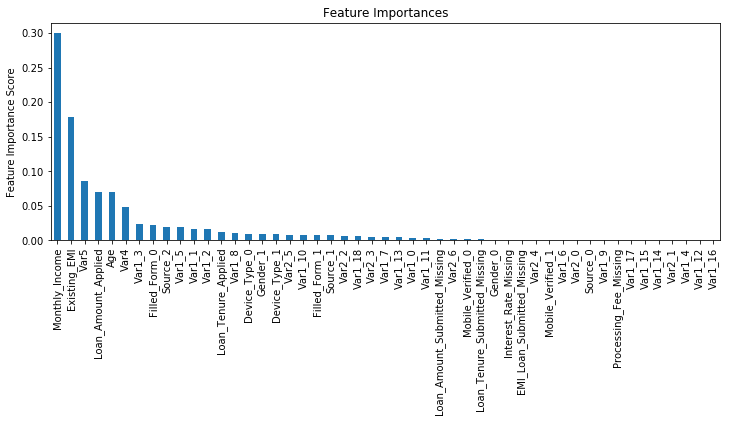

In [35]:
#Choose all predictors except target & IDcols
predictors = [x for x in train.columns if x not in [target, IDcol]]
gbm0 = GradientBoostingClassifier(random_state=10)
modelfit(gbm0, train, test, predictors)

## GBM Models:
There 2 types of parameters here:
1. Tree-specific parameters
    - min_samples_split
    - min_samples_leaf
    - max_depth
    - min_leaf_nodes
    - max_features
    - loss function
2. Boosting specific paramters
    - n_estimators
    - learning_rate
    - subsample
    
### Approach for tackling the problem
1. Decide a relatively higher value for learning rate and tune the number of estimators requried for that.
2. Tune the tree specific parameters for that learning rate
3. Tune subsample
4. Lower learning rate as much as possible computationally and increase the number of estimators accordingly.

#### Step 1- Find the number of estimators for a high learning rate
We will use the following benchmarks for parameters:
1. min_samples_split = 500 : ~0.5-1% of total values. Since this is imbalanced class problem, we'll take small value
2. min_samples_leaf = 50 : Just using for preventing overfitting. will be tuned later.
3. max_depth = 8 : since high number of observations and predictors, choose relatively high value
4. max_features = 'sqrt' : general thumbrule to start with
5. subsample = 0.8 : typically used value (will be tuned later)

0.1 is assumed to be a good learning rate to start with. Let's try to find the optimum number of estimators requried for this.

In [36]:
#Choose all predictors except target & IDcols
predictors = [x for x in train.columns if x not in [target, IDcol]]
param_test1 = {'n_estimators':list(range(20,81,10))}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,
                                  min_samples_leaf=50,max_depth=8,max_features='sqrt', subsample=0.8,random_state=10),
                        param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(train[predictors],train[target])

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=8,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=50,
              min_samples_split=500, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=10,
              subsample=0.8, verbose=0, warm_start=False),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'n_estimators': [20, 30, 40, 50, 60, 70, 80]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [37]:
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.83337, std: 0.00991, params: {'n_estimators': 20},
  mean: 0.83697, std: 0.00994, params: {'n_estimators': 30},
  mean: 0.83832, std: 0.01050, params: {'n_estimators': 40},
  mean: 0.83867, std: 0.01081, params: {'n_estimators': 50},
  mean: 0.83945, std: 0.01073, params: {'n_estimators': 60},
  mean: 0.83920, std: 0.01030, params: {'n_estimators': 70},
  mean: 0.83842, std: 0.01075, params: {'n_estimators': 80}],
 {'n_estimators': 60},
 0.8394485889741455)

So we got 60 as the optimal estimators for the 0.1 learning rate. Note that 60 is a reasonable value and can be used as it is. But it might not be the same in all cases. Other situations:
    - If the value is around 20, you might want to try lowering the learning rate to 0.05 and re-run grid search
    - If the values are too high ~100, tuning the other parameters will take long time and you can try a higher learning rate
    
#### Step 2- Tune tree-specific parameters
Now, lets move onto tuning the tree parameters. We will do this in 2 stages:
1. Tune max_depth and num_samples_split
2. Tune min_samples_leaf
3. Tune max_features

In [38]:
#Grid seach on subsample and max_features
param_test2 = {'max_depth':list(range(5,16,2)), 'min_samples_split':list(range(200,1001,200))}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,
                                                max_features='sqrt', subsample=0.8, random_state=10), 
                       param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(train[predictors],train[target])

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=60, presort='auto', random_state=10,
              subsample=0.8, verbose=0, warm_start=False),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'max_depth': [5, 7, 9, 11, 13, 15], 'min_samples_split': [200, 400, 600, 800, 1000]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [39]:
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.83297, std: 0.01226, params: {'max_depth': 5, 'min_samples_split': 200},
  mean: 0.83251, std: 0.01054, params: {'max_depth': 5, 'min_samples_split': 400},
  mean: 0.83386, std: 0.01415, params: {'max_depth': 5, 'min_samples_split': 600},
  mean: 0.83379, std: 0.01169, params: {'max_depth': 5, 'min_samples_split': 800},
  mean: 0.83339, std: 0.01266, params: {'max_depth': 5, 'min_samples_split': 1000},
  mean: 0.83365, std: 0.00787, params: {'max_depth': 7, 'min_samples_split': 200},
  mean: 0.83663, std: 0.00991, params: {'max_depth': 7, 'min_samples_split': 400},
  mean: 0.83481, std: 0.00826, params: {'max_depth': 7, 'min_samples_split': 600},
  mean: 0.83786, std: 0.01067, params: {'max_depth': 7, 'min_samples_split': 800},
  mean: 0.83769, std: 0.01060, params: {'max_depth': 7, 'min_samples_split': 1000},
  mean: 0.83581, std: 0.01003, params: {'max_depth': 9, 'min_samples_split': 200},
  mean: 0.83729, std: 0.00959, params: {'max_depth': 9, 'min_samples_split': 400},
  

Since we reached the maximum of min_sales_split, we should check higher values as well. Also, we can tune min_samples_leaf with it now as max_depth is fixed. One might argue that max depth might change for higher value but if you observe the output closely, a max_depth of 9 had a better model for most of cases. So lets perform a grid search on them:

In [40]:
#Grid seach on subsample and max_features
param_test3 = {'min_samples_split':list(range(1000,2100,200)), 'min_samples_leaf':list(range(30,71,10))}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=9,
                                                    max_features='sqrt', subsample=0.8, random_state=10), 
                       param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(train[predictors],train[target])

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=9,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=60, presort='auto', random_state=10,
              subsample=0.8, verbose=0, warm_start=False),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'min_samples_split': [1000, 1200, 1400, 1600, 1800, 2000], 'min_samples_leaf': [30, 40, 50, 60, 70]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [41]:
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.83821, std: 0.01092, params: {'min_samples_leaf': 30, 'min_samples_split': 1000},
  mean: 0.83880, std: 0.01260, params: {'min_samples_leaf': 30, 'min_samples_split': 1200},
  mean: 0.83552, std: 0.01024, params: {'min_samples_leaf': 30, 'min_samples_split': 1400},
  mean: 0.83683, std: 0.01429, params: {'min_samples_leaf': 30, 'min_samples_split': 1600},
  mean: 0.83958, std: 0.01233, params: {'min_samples_leaf': 30, 'min_samples_split': 1800},
  mean: 0.83852, std: 0.01097, params: {'min_samples_leaf': 30, 'min_samples_split': 2000},
  mean: 0.83839, std: 0.00896, params: {'min_samples_leaf': 40, 'min_samples_split': 1000},
  mean: 0.83757, std: 0.01274, params: {'min_samples_leaf': 40, 'min_samples_split': 1200},
  mean: 0.83757, std: 0.01074, params: {'min_samples_leaf': 40, 'min_samples_split': 1400},
  mean: 0.83779, std: 0.01199, params: {'min_samples_leaf': 40, 'min_samples_split': 1600},
  mean: 0.83764, std: 0.01366, params: {'min_samples_leaf': 40, 'min_samples_spl

Here we get the optimum values as 1200 for min_samples_split and 60 for min_samples_leaf. Also, we can see the CV score increasing to 0.8396 now. Let’s fit the model again on this and have a look at the feature importance.


Model Report
Accuracy : 0.9854
AUC Score (Train): 0.896453
CV Score : Mean - 0.8397598 | Std - 0.009936017 | Min - 0.8255474 | Max - 0.8527672


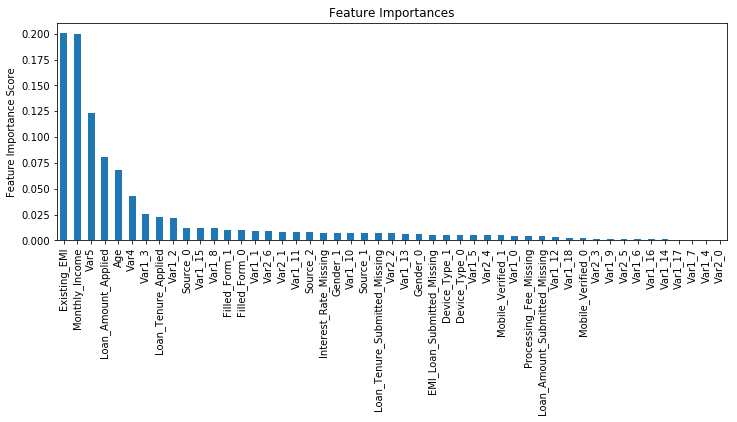

In [42]:
modelfit(gsearch3.best_estimator_, train, test, predictors)

If you compare the feature importance of this model with the baseline model, you’ll find that now we are able to derive value from many more variables. Also, earlier it placed too much importance on some variables but now it has been fairly distributed.

Now lets tune the last tree-parameters, i.e. max_features by trying 7 values from 7 to 19 in steps of 2.

In [43]:
param_test4 = {'max_features':list(range(7,20,2))}
gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=9, min_samples_split=1200, min_samples_leaf=60, subsample=0.8, random_state=10),
param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(train[predictors],train[target])
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

([mean: 0.83976, std: 0.00994, params: {'max_features': 7},
  mean: 0.83648, std: 0.00988, params: {'max_features': 9},
  mean: 0.83919, std: 0.01042, params: {'max_features': 11},
  mean: 0.83738, std: 0.01017, params: {'max_features': 13},
  mean: 0.83898, std: 0.01101, params: {'max_features': 15},
  mean: 0.83495, std: 0.00931, params: {'max_features': 17},
  mean: 0.83524, std: 0.01018, params: {'max_features': 19}],
 {'max_features': 7},
 0.839759762884295)

Here, we find that optimum value is 7, which is also the square root. So our initial value was the best. You might be anxious to check for lower values and you should if you like. I’ll stay with 7 for now. With this we have the final tree-parameters as:
- min_samples_split: 1200
- min_samples_leaf: 60
- max_depth: 9
- max_features: 7

## Tuning subsample and making models with lower learning rate

The next step would be try different subsample values. Lets take values 0.6,0.7,0.75,0.8,0.85,0.9.

In [44]:
param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
gsearch5 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=9,min_samples_split=1200, min_samples_leaf=60, subsample=0.8, random_state=10,max_features=7),
param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch5.fit(train[predictors],train[target])
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

([mean: 0.83645, std: 0.00942, params: {'subsample': 0.6},
  mean: 0.83629, std: 0.01185, params: {'subsample': 0.7},
  mean: 0.83601, std: 0.01074, params: {'subsample': 0.75},
  mean: 0.83976, std: 0.00994, params: {'subsample': 0.8},
  mean: 0.84086, std: 0.00997, params: {'subsample': 0.85},
  mean: 0.83828, std: 0.00984, params: {'subsample': 0.9}],
 {'subsample': 0.85},
 0.840858008321874)

Here, we found 0.85 as the optimum value. Finally, we have all the parameters needed. Now, we need to lower the learning rate and increase the number of estimators proportionally. Note that these trees might not be the most optimum values but a good benchmark.

As trees increase, it will become increasingly computationally expensive to perform CV and find the optimum values. For you to get some idea of the model performance, I have included the private leaderboard scores for each. Since the data is not open, you won’t be able to replicate that but it’ll good for understanding.

Lets decrease the learning rate to half, i.e. 0.05 with twice (120) the number of trees.


Model Report
Accuracy : 0.9854
AUC Score (Train): 0.897619
CV Score : Mean - 0.8391332 | Std - 0.009437997 | Min - 0.8271238 | Max - 0.8511221


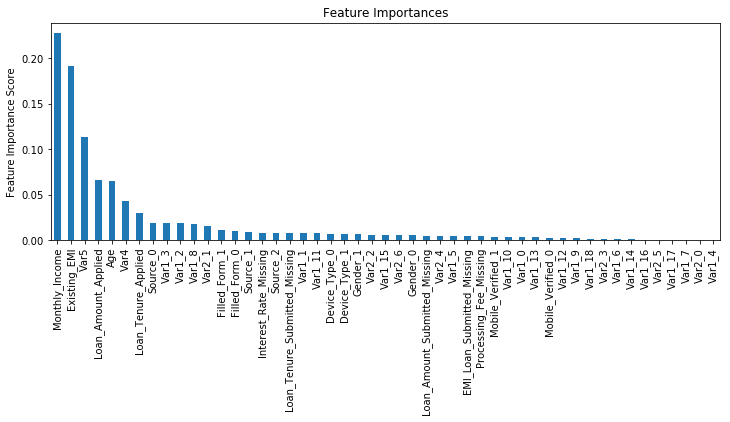

In [45]:
predictors = [x for x in train.columns if x not in [target, IDcol]]
gbm_tuned_1 = GradientBoostingClassifier(learning_rate=0.05, n_estimators=120,max_depth=9, min_samples_split=1200,min_samples_leaf=60, subsample=0.85, random_state=10, max_features=7)
modelfit(gbm_tuned_1, train, test, predictors)

**Private LB Score: 0.844139**

Now lets reduce to one-tenth of the original value, i.e. 0.01 for 600 trees.


Model Report
Accuracy : 0.9854
AUC Score (Train): 0.899962
CV Score : Mean - 0.8407913 | Std - 0.01011421 | Min - 0.8255379 | Max - 0.8522251


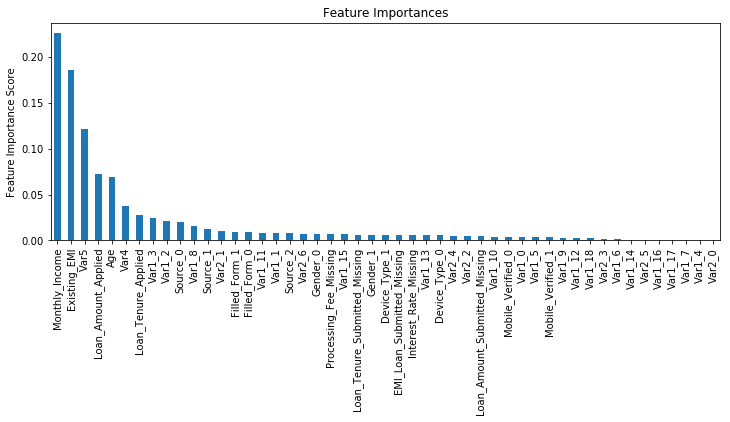

In [46]:
predictors = [x for x in train.columns if x not in [target, IDcol]]
gbm_tuned_2 = GradientBoostingClassifier(learning_rate=0.01, n_estimators=600,max_depth=9, min_samples_split=1200,min_samples_leaf=60, subsample=0.85, random_state=10, max_features=7)
modelfit(gbm_tuned_2, train, test, predictors)

**Private LB Score: 0.848145**

Lets decrease to one-twentieth of the original value, i.e. 0.005 for 1200 trees.


Model Report
Accuracy : 0.9854
AUC Score (Train): 0.900716


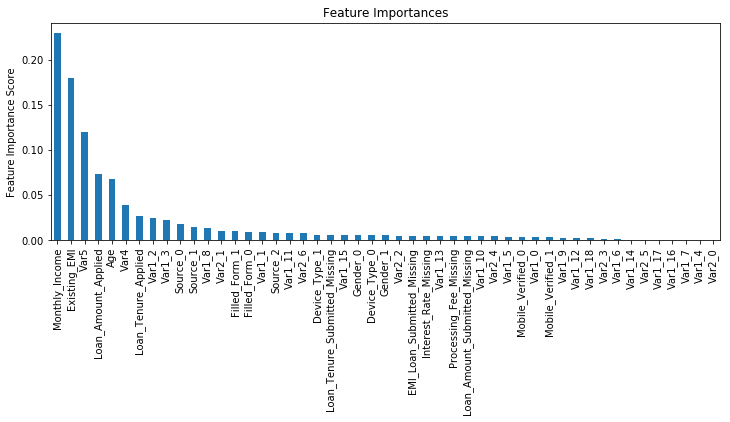

In [47]:
predictors = [x for x in train.columns if x not in [target, IDcol]]
gbm_tuned_3 = GradientBoostingClassifier(learning_rate=0.005, n_estimators=1200,max_depth=9, min_samples_split=1200, min_samples_leaf=60, subsample=0.85, random_state=10, max_features=7,
warm_start=True)
modelfit(gbm_tuned_3, train, test, predictors, performCV=False)

Private LB Score: 0.848112

Here we see that the score reduced very slightly. So lets run for 1500 trees.


Model Report
Accuracy : 0.9854
AUC Score (Train): 0.906332


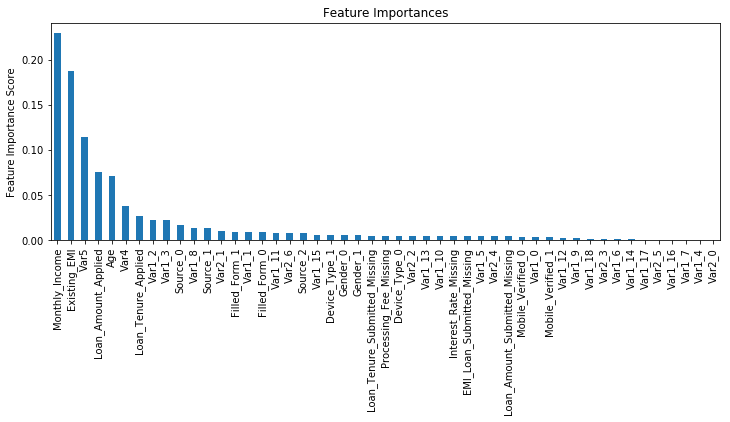

In [48]:
predictors = [x for x in train.columns if x not in [target, IDcol]]
gbm_tuned_4 = GradientBoostingClassifier(learning_rate=0.005, n_estimators=1500,max_depth=9, min_samples_split=1200, min_samples_leaf=60, subsample=0.85, random_state=10, max_features=7,
warm_start=True)
modelfit(gbm_tuned_4, train, test, predictors, performCV=False)

Private LB Score: 0.848747

Therefore, now you can clearly see that this is a very important step as private LB scored improved from ~0.844 to ~0.849 which is a significant jump.

Another hack that can be used here is the ‘warm_start’ parameter of GBM. You can use it to increase the number of estimators in small steps and test different values without having to run from starting always. You can also download the iPython notebook with all these model codes from my GitHub account.